# TASK 3 - Exploratory Data Analysis- Retail

# Astha Gupta 

# 
Importing required Libraries 

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [3]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_b5e4395261094707a652232dcef320f2 = 'https://s3.eu-geo.objectstorage.softlayer.net'
else:
    endpoint_b5e4395261094707a652232dcef320f2 = 'https://s3.eu-geo.objectstorage.service.networklayer.com'

client_b5e4395261094707a652232dcef320f2 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='D26dFIlW3hWtg4ipUx6-6spIZHFYjt9HZofSN6QzBslI',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_b5e4395261094707a652232dcef320f2)

body = client_b5e4395261094707a652232dcef320f2.get_object(Bucket='tsfgrip-donotdelete-pr-bsofybhkklferh',Key='SampleSuperstore.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
df.shape

(9994, 13)

In [5]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


# 
Since the number of rows and the count of each column is same, so there are no null values in the dataset.

In [6]:
df=df.drop(["Country","Postal Code"],axis=1)

In [7]:
df.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [8]:
corr=df.corr()
corr

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


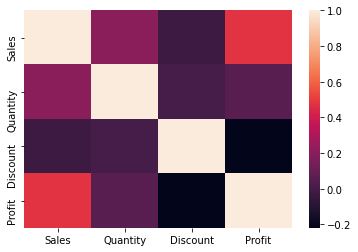

In [9]:
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns)

# 
From this heat map we can see that there is 
- Negative correlation between discount and profit. 
- No correlation between discount and sales.
- Positive correlation between 

# Plotting Profit for different columns 
1. Profit for each Ship mode

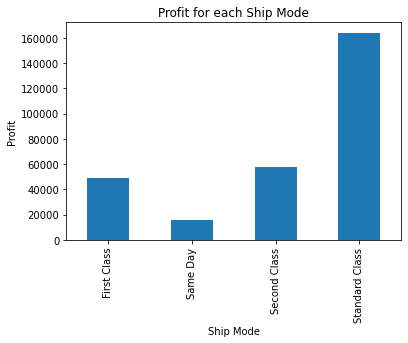

In [10]:
df1=df.groupby('Ship Mode',axis=0).sum()
df1['Profit'].plot(kind='bar')
plt.title("Profit for each Ship Mode")
plt.ylabel("Profit")
plt.show()

Profit is maximum for Standard Class.

2. Profit for each Segment

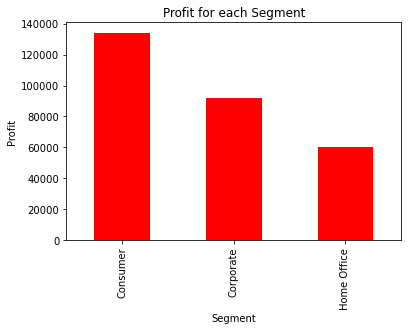

In [12]:
df2=df.groupby('Segment',axis=0).sum()
df2['Profit'].plot(kind='bar',color='red')
plt.title("Profit for each Segment")
plt.ylabel("Profit")
plt.show()

Profit is maximum for Consumer Segment.

3. Profit for each State

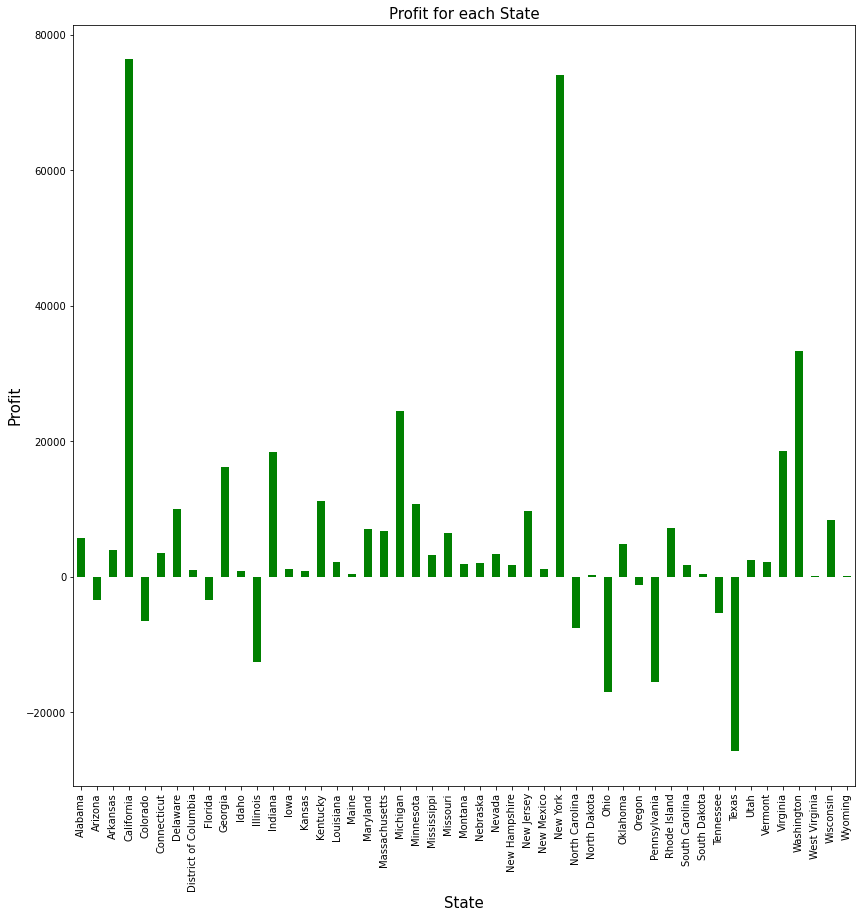

In [20]:
plt.figure(figsize=(14,14))
df3=df.groupby('State',axis=0).sum()
df3['Profit'].plot(kind='bar',color='green')
plt.title("Profit for each State",fontsize=15)
plt.xlabel("State",fontsize=15)
plt.ylabel("Profit",fontsize=15)
plt.show()

California accounts for maximum profit whereas texas accounts for the maximum loss.

4. Profit for each region

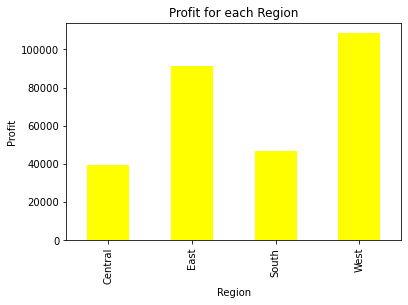

In [16]:
df4=df.groupby('Region',axis=0).sum()
df4['Profit'].plot(kind='bar',color='yellow')
plt.title("Profit for each Region")
plt.ylabel("Profit")
plt.show()

Profit is maximum for the Western Region.

5. Profit for each Category 

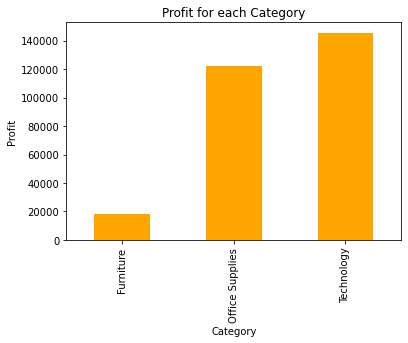

In [17]:
df5=df.groupby('Category',axis=0).sum()
df5['Profit'].plot(kind='bar',color='orange')
plt.title("Profit for each Category")
plt.ylabel("Profit")
plt.show()

Profit is maximum for the Technology Category.

6. Profit for each Sub-Category 

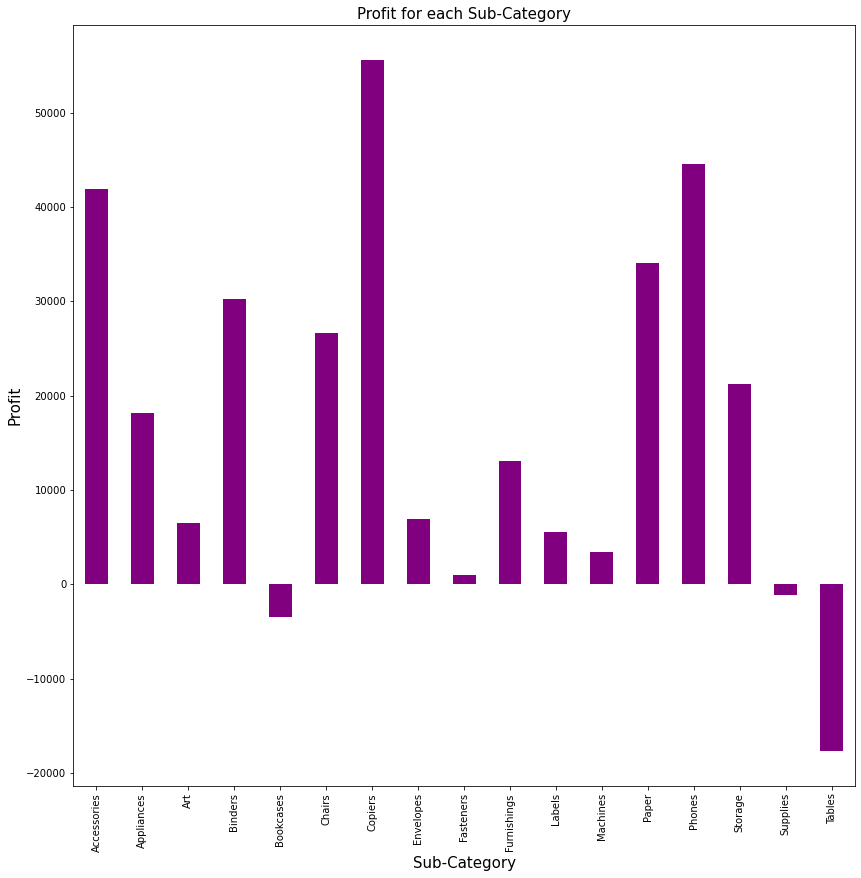

In [22]:
plt.figure(figsize=(14,14))
df6=df.groupby('Sub-Category',axis=0).sum()
df6['Profit'].plot(kind='bar',color='purple')
plt.title("Profit for each Sub-Category",fontsize=15)
plt.xlabel("Sub-Category",fontsize=15)
plt.ylabel("Profit",fontsize=15)
plt.show()

Maximum profit is made by Copiers and maximum loss by Tabels.

In [24]:
F1=df.set_index('Category')
f=pd.DataFrame(F1['Sub-Category'])
f.drop_duplicates()

,Sub-Category
Category,
Furniture,Bookcases
Furniture,Chairs
Office Supplies,Labels
Furniture,Tables
Office Supplies,Storage
Furniture,Furnishings
Office Supplies,Art
Technology,Phones
Office Supplies,Binders


The insights that we have got are consistent since the copiers accounts for the maximum profit which comes under Technology category which brings the maximum profit among all the categories. Similarly, maximum loss is suffered by the tables sun category which comes under Office supplies that brings the least profit.